## Week 4 Homework

#### Your Name

Use the materials covered in class to complete the homework assignment. Run the code below to get started.

In [1]:
import pandas as pd #pandas import
import numpy as np #numpy import
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
pd.set_option('display.max_columns', None) #displays all columns instead of a max of 20
pd.set_option('display.max_rows', None) #displays all rows instead of a max of 20

##### Prompt 1

Read in the file called 'Week 3 HW Output.xlsx'. Print the first five rows of your DataFrame.

In [2]:
df = pd.read_excel('Week 3 HW Output.xlsx')
df.head()

,City,Country,Inexpensive Meal,Midrange Meal For 2,McMeal,Domestic Beer (at restaurant),Imported Beer (at restaurant),Cappuccino (at restaurant),Soft Drink (at restaurant),Water (at restaurant),Milk (at Grocery),White Bread,Rice,Eggs,Cheese,Chicken,Beef,Apples,Bananas,Oranges,Tomato,Potato,Onion,Lettuce,Water (at Grocery),Wine (at Grocery),Domestic Beer (at Grocery),Imported Beer (at Grocery),data_quality,City/Country,Avg_Fruit,Avg_Veg,year,Continent
0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,0.19,0.73,0.51,0.88,1.01,4.32,3.79,5.57,1.80,0.75,1.01,0.60,0.36,0.41,0.70,0.36,9.79,1.53,2.51,1,"Delhi, India",1.186667,0.5175,2021,Asia
1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,0.32,2.68,2.57,1.18,2.17,18.01,4.67,12.79,2.22,1.55,2.11,1.47,0.82,1.02,0.82,0.62,13.97,0.91,1.93,1,"Shanghai, China",1.960000,1.0325,2021,Asia
2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,0.27,1.28,1.21,0.83,1.70,6.66,3.46,8.32,2.80,1.52,2.08,1.24,1.35,2.10,1.13,0.42,20.66,2.06,3.18,1,"Jakarta, Indonesia",2.133333,1.4550,2021,Asia
3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,0.51,1.63,1.19,0.89,1.73,5.06,4.19,6.64,2.66,1.42,2.95,1.42,1.76,1.75,1.36,0.65,8.84,1.15,1.55,1,"Manila, Philippines",2.343333,1.5725,2021,Asia
4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,0.78,2.13,2.78,3.66,4.02,11.13,10.62,40.41,6.79,3.70,6.40,6.36,3.86,2.81,2.40,1.06,15.08,2.10,2.49,1,"Seoul, South Korea",5.630000,3.8575,2021,Asia


##### Prompt 2 -6

Perform the following 5 steps to conduct a T-test comparing Average Fruit in each year. Make sure to interpret each test. Proceed with the statistical analysis regardless of if the assumptions are violated (this is just practice, in reality you would want to be very cautious about continuing with any analysis when assumptions are violated).

Two things to note: (1) you will to reshape your data to facilitate your ability to complete steps, (2) it makes the most sense to compare data based on each country, this means the two distributions WILL be related since they are coming from the same country:
    
    Prompt 2. Visualize the distribution of each group (year).
    Prompt 3. Test the normality of each group's distribution. Interpret the results.
    Prompt 4. Test for homogenity of variance. Interpret the results.
    Prompt 5. Visualize group means (this will repeat a prompt from Week 3).
    Prompt 6. Perform and interpret the t-test.

In [8]:
#Remove missing data
df=df.dropna()
#Group our dataframe by each Country
#df = df.groupby('Country')

#We will compare two different datasets, one with only reliable data (i.e, data_quality = 1) and one with unreliable data inclusive
#OnlyRel = df[df['data_quality']==1] #Reliable dataset

<AxesSubplot:xlabel='year', ylabel='Avg_Fruit'>

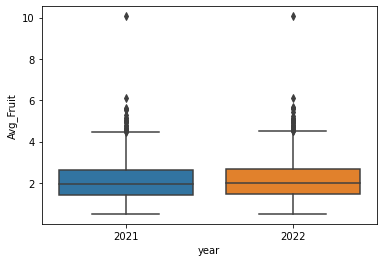

In [9]:
#Prompt 2 use histogram, hue = data_quality
sns.boxplot(data=df,x='year', y='Avg_Fruit')
#sns.boxplot(data=OnlyRel,x='Country', y = 'Avg_Fruit',hue='year')

In [10]:
#Prompt 3 Test for normality of each group
print(ss.normaltest(df['Avg_Fruit'][df['year']==2021])) 
#pvalue >.05 fail to reject the null and the data is normally distributed

print(ss.normaltest(df['Avg_Fruit'][df['year']==2022])) 
#pvalue <.05 reject the null and the data is not normally distributed

NormaltestResult(statistic=281.02790754744126, pvalue=9.452903962421979e-62)
NormaltestResult(statistic=276.49288528124794, pvalue=9.127100201119465e-61)


#### Since our p-value is less than 0.05 we reject the null. The data is not normally distributed

In [11]:
#Prompt 4
print(ss.levene(df['Avg_Fruit'][df['year']==2021],df['Avg_Fruit'][df['year']==2022])) 

LeveneResult(statistic=0.11950528801125297, pvalue=0.729612016771809)


#### Since the p-value is greater than .05 we fail to reject the null. The groups have similar variance

<AxesSubplot:xlabel='year', ylabel='Avg_Fruit'>

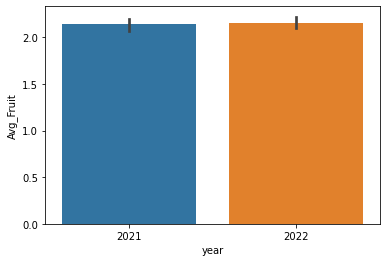

In [12]:
#Prompt 5
sns.barplot(data=df,x='year', y='Avg_Fruit')

In [13]:
#Prompt 6
tvalue, pvalue =ss.ttest_ind(df['Avg_Fruit'][df['year']==2021],df['Avg_Fruit'][df['year']==2022])#pvalue >.05 fail to reject the null; groups are not significant different
print(tvalue, pvalue)

#if/elif statement based on pvalue
if pvalue > .05:
    print('The groups are the same')
elif pvalue < .05:
    print('The groups are different')

-0.36979560965295966 0.7115782400668669
The groups are the same


#### Since we failed to reject the null, it follows that the groups are the same. In conclusion, the means of average fruits for each country are the same in 2021 and 2022.

##### Prompt 7 - 10
Conduct a simple linear regression to demonstrate the relationship between average fruit and average veg with the following steps:

    Prompt 7. Create a visualization of the relationship between average fruit and average veg (this will repeat a prompt from Week 3).
    Prompt 8. Run the linear regression model to predict average veg from average fruit and interpret the results.
    Prompt 9. Calculate the Rsquared to determine how much variance in average veg is accounted for by average fruit.
    Prompt 10. Create a function that will return the predicted value of average veg for any inputted value of average fruit. Test your function so it outputs the predicted value of average veg with average fruit is 10.


<AxesSubplot:xlabel='Avg_Veg', ylabel='Avg_Fruit'>

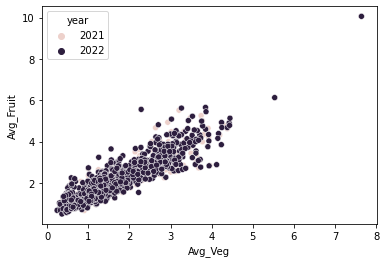

In [14]:
#Prompt 7
sns.scatterplot(x="Avg_Veg", y="Avg_Fruit", hue='year', data=df)

<AxesSubplot:xlabel='Avg_Veg', ylabel='Avg_Fruit'>

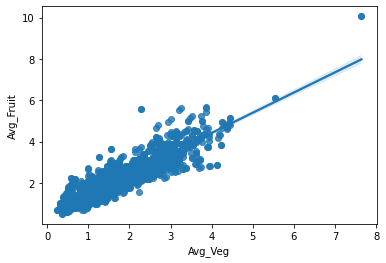

In [15]:
#Prompt 8
sns.regplot(x="Avg_Veg", y="Avg_Fruit",data=df)

#### An increase in the price of average vegetable will result in an increase in the price of average fruit, and vice versa.

In [16]:
#Prompt 9
linregresults=ss.linregress(x=df['Avg_Veg'],y=df['Avg_Fruit'])
print(linregresults.rvalue, linregresults.pvalue)
print('Average Vegatables explains', linregresults.rvalue**2, '% of the variance in Average Fruit')

0.8967521132111935 0.0
Average Vegatables explains 0.8041643525487413 % of the variance in Average Fruit


In [7]:
#Prompt 10
avg_fruit = int(input("Please input average fruit value"))
df['predicted']=linregresults.intercept + (linregresults.slope*avg_fruit)

Please input average fruit value10
